download dataset
https://www.kaggle.com/datasets/ramendrapandey/nhanes-2015-2016?resource=download

https://www.kaggle.com/code/lalina/exploratory-data-analysis-project/notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
da = pd.read_csv('NHANES.csv')

In [5]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
data = da.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [8]:
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [9]:
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi


In [10]:
data.drop(columns = 'seqn', inplace = True)

In [11]:
data.head()


,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [14]:
# Check for missing data
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [15]:
# Drop the missing values
data.dropna(inplace = True)

In [16]:
# Descriptive analysis of numerical data
numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


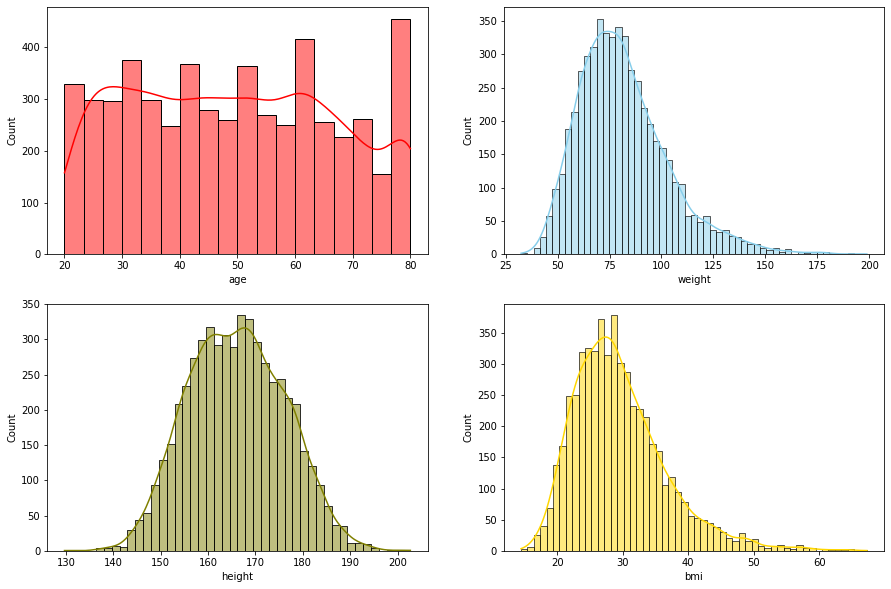

In [17]:
# Create histogram for numerical variable
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

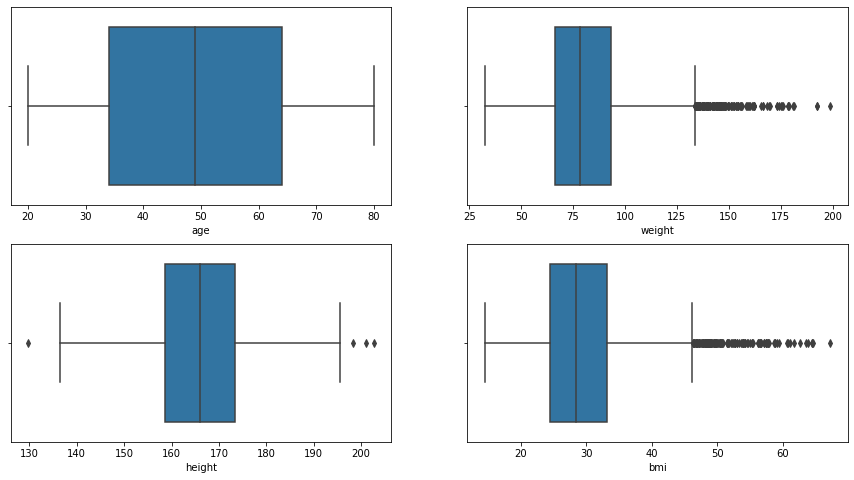

In [18]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

In [21]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [22]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [24]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

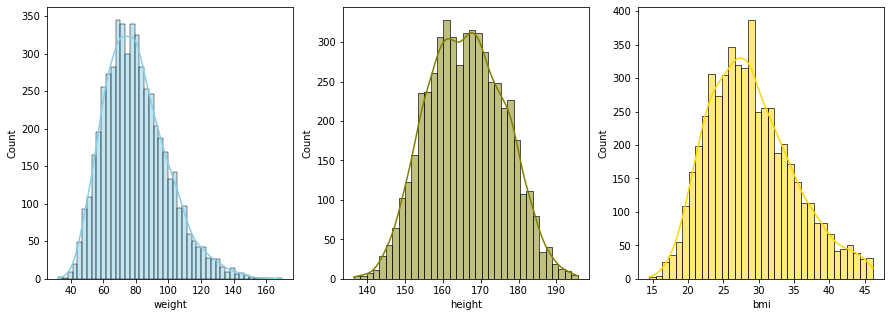

In [25]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


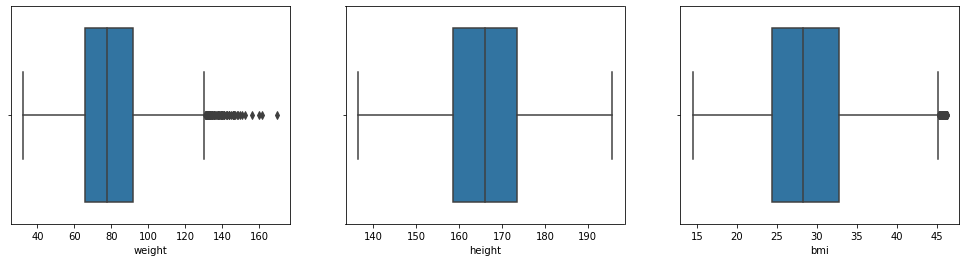

In [26]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

plt.show()

In [27]:
# smoking
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [28]:
categorical = data[['smoking','gender','education']]
categorical.head()

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [29]:
# Check the skewness of numerical variables
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

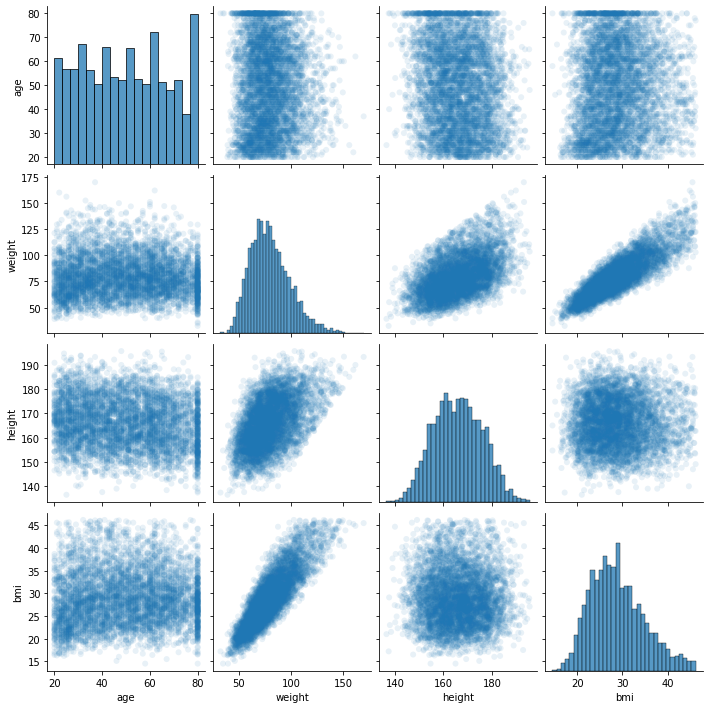

In [30]:
# Pairplot of numerical variables
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

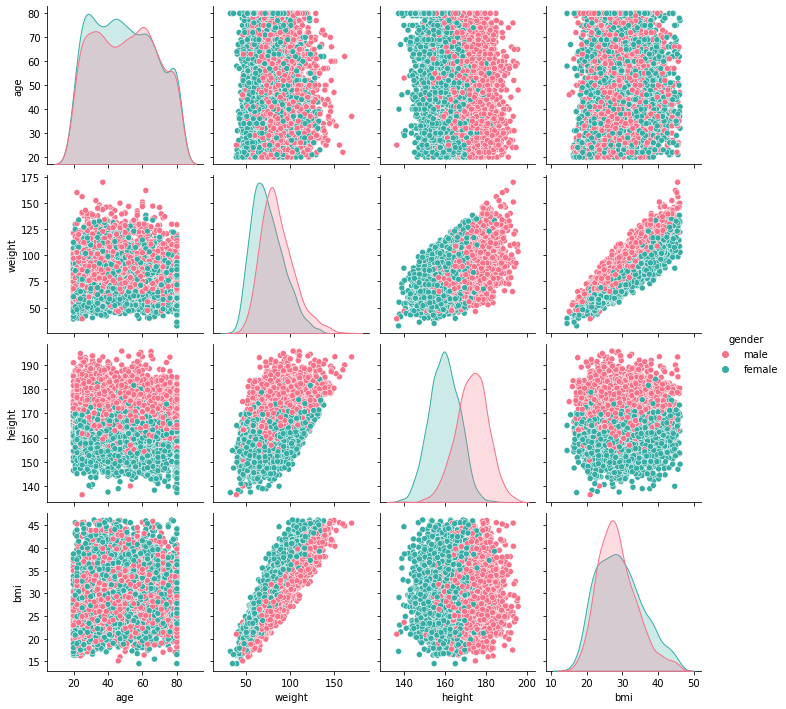

In [31]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')